In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


In [2]:
#loading an image
image = Image.open('images/Thanos.jpg')


In [3]:
#changing image to bytes so as to get pixel intesities
image_to_float = image.tobytes()
pixel_intensities = [image_to_float[i] for i in range(len(image_to_float))]
print(len(pixel_intensities)) 

5160096


In [4]:
#length is found to be 5160096
#from image properties, width = 1748, height = 984
#from len, channels = 3, 1 for each color in 'RGB'

# To plot cumulative frequency of pixel intensities

img = np.array(pixel_intensities).reshape((984,1748,3))

hist, bins = np.histogram(img.flatten(),256,[0,256])

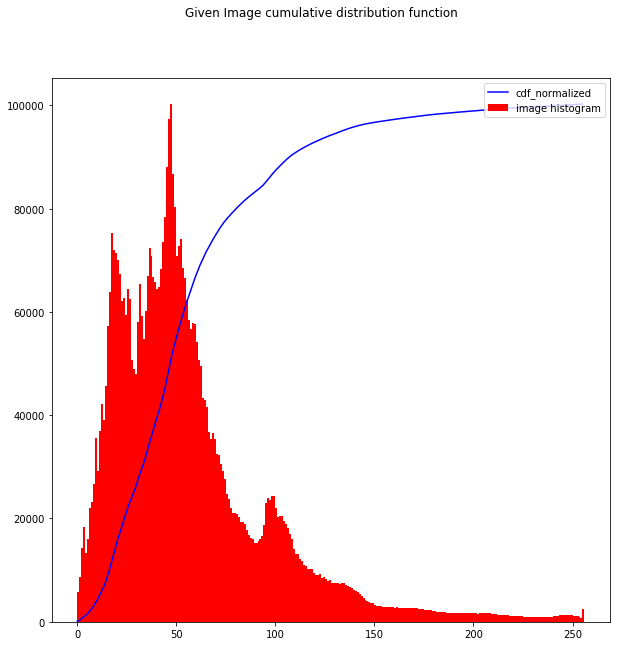

In [5]:
#cumulative distribution function
cdf = hist.cumsum()                     
cdf_normalized = cdf*hist.max()/cdf.max()

fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("Given Image cumulative distribution function")
ax.plot(cdf_normalized,color='b')
ax.hist(img.flatten(),256,[0,256],color='r')
ax.legend(['cdf_normalized','image histogram'],loc='upper right')
plt.savefig('images/input_histogram.png')
plt.show()


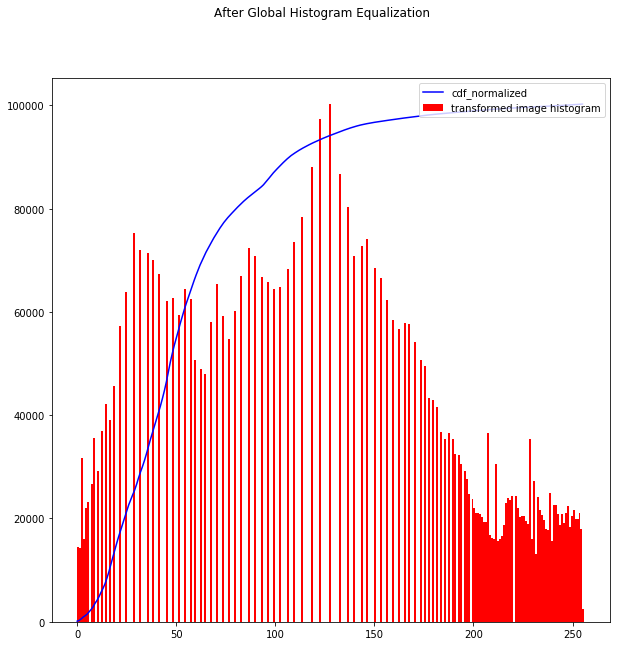

In [6]:
#as we can see from the plot, histogram is centered in the beginning
#so transforming our image using HistogramEqualization techninque will provide better contrast

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = ((cdf_m - cdf_m.min())*255)/(cdf_m.max() - cdf_m.min())
cdf_scaled = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf_scaled[img]

fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("After Global Histogram Equalization")
ax.plot(cdf_normalized,color='b')
ax.hist(img2.flatten(),256,[0,256],color='r')
ax.legend(['cdf_normalized','transformed image histogram'],loc='upper right')
plt.savefig('images/output_histogram.png')
plt.show()

(984, 1748, 3)


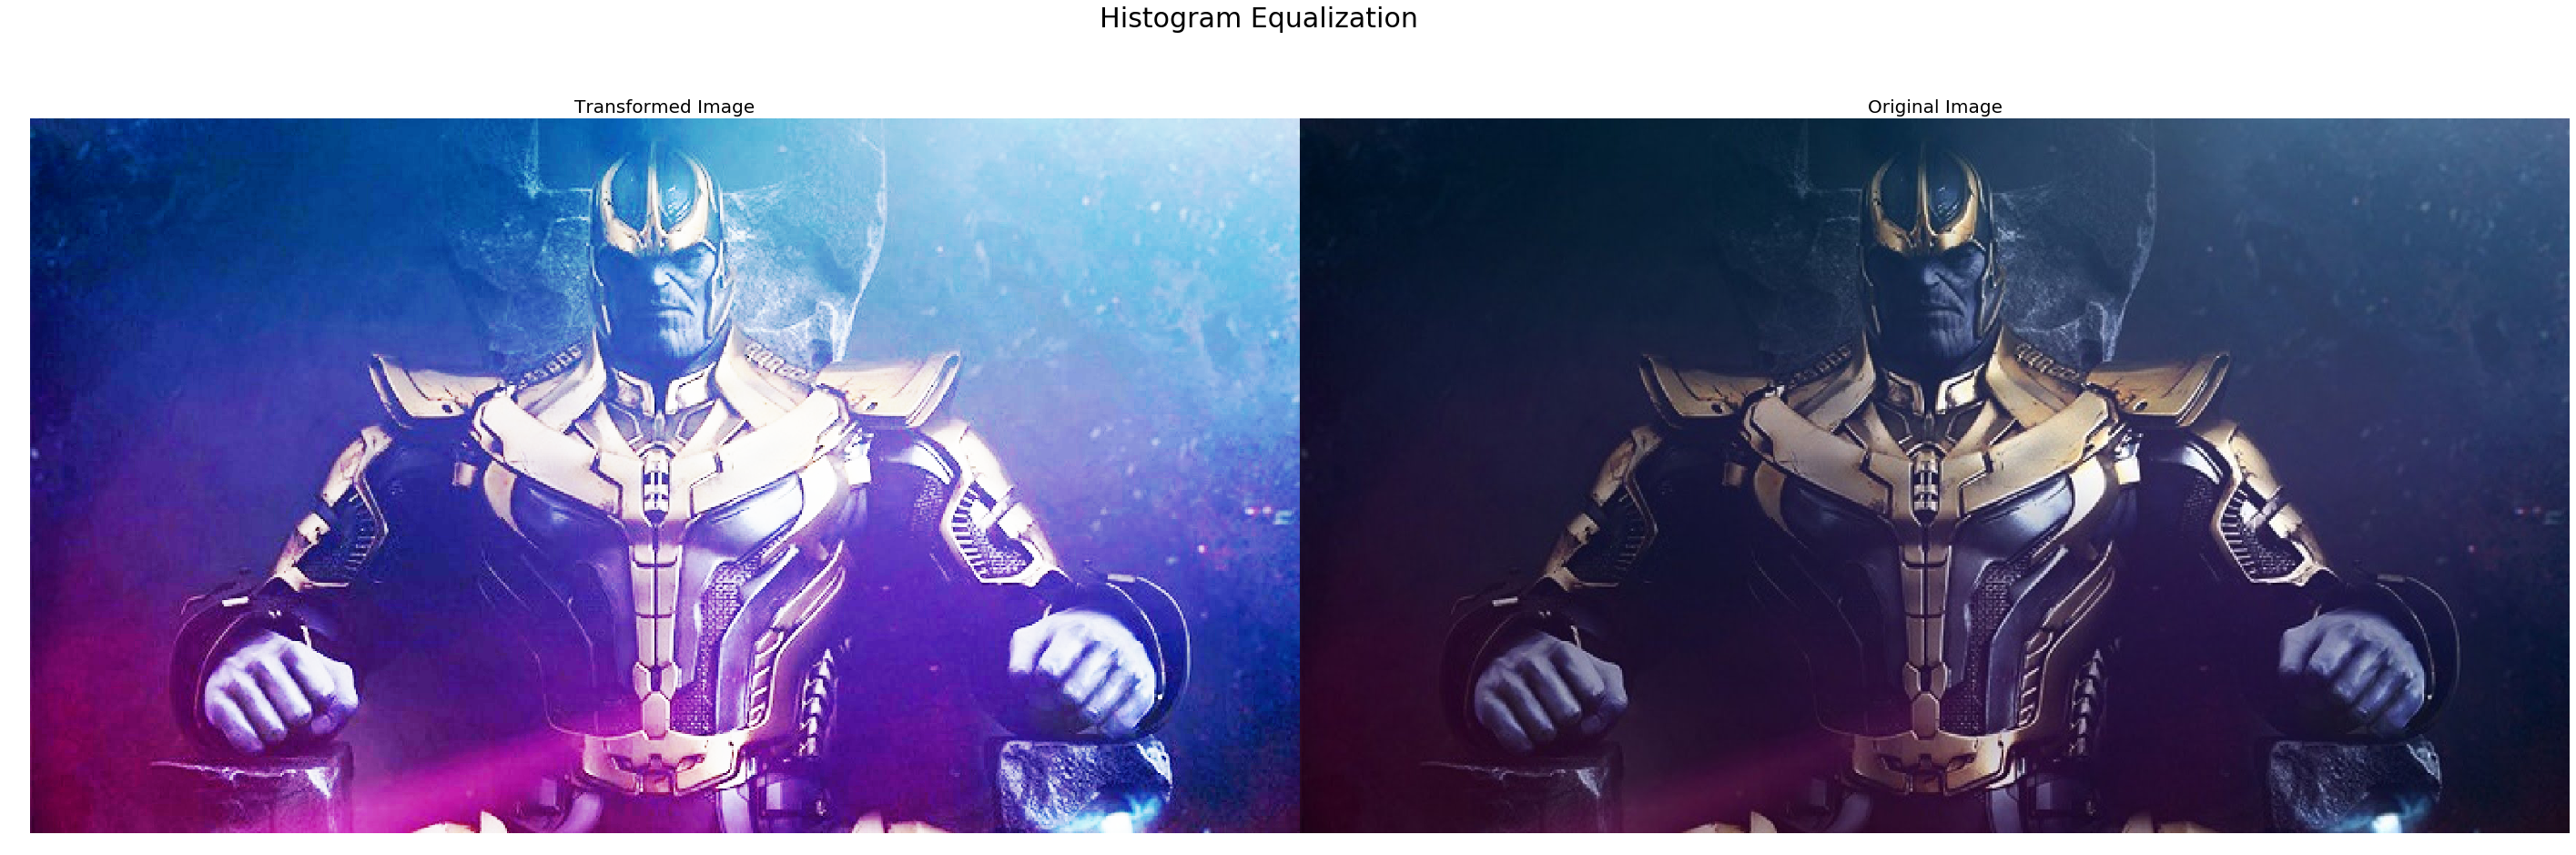

In [7]:
#showing the transformed image!
font_dict = {'fontsize': 20,
             'fontweight' : 20,
             'verticalalignment':'baseline',
             }
print(img2.shape)
fig,axes = plt.subplots(1,2,figsize=(50,15),sharey = True)
fig.suptitle('Histogram Equalization', fontsize=30,fontweight = 30)

axes[0].imshow(img2.astype('uint8'),cmap = 'gray')
axes[0].set_axis_off()
axes[0].set_title("Transformed Image",fontdict = font_dict)
axes[1].imshow(img.astype('uint8'),cmap = 'gray')
axes[1].set_axis_off()
axes[1].set_title("Original Image",fontdict = font_dict)

plt.subplots_adjust(wspace=0)   #setting width betweent 2 plots to 0
plt.savefig('images/transformed_image2.png')

plt.show()


In [8]:
#from the transfomed image we caan see, image is showing more brightness.
#But as proved in many researches, using GlobalHistogramEqualization on a coloured image is not a good choice,
#so i will be converting RGB image to YCbCr image so that I change only 'luminance Y' channel of the image and then convert it bakc to RGB form for seeing the results


def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    return np.uint8(rgb.dot(xform.T))


ycbcr = image.convert('YCbCr')
ycbcr_to_float = np.ndarray((image.size[1],image.size[0],3),'u1',ycbcr.tobytes())

In [9]:
#now transforming only 'Y' component of the image
img_y = ycbcr_to_float[:,:,0]

hist_Y, bins = np.histogram(img_y.flatten(),256,[0,256])

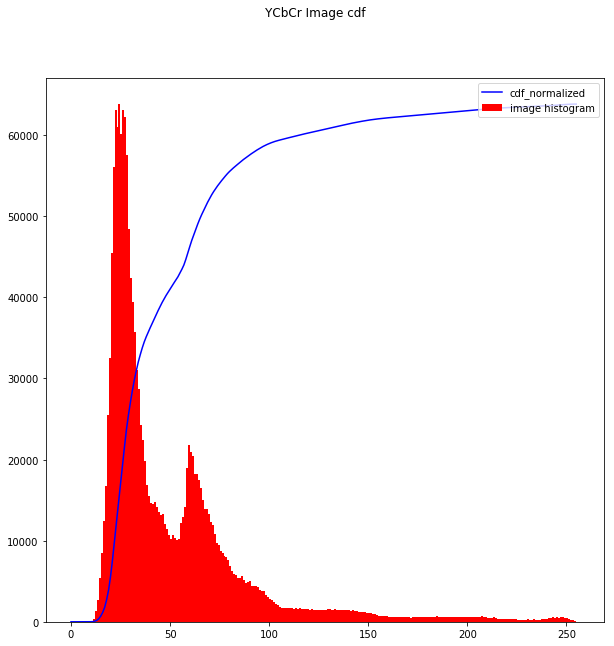

In [10]:
#cumulative distribution function
cdf_Y = hist_Y.cumsum()
cdf_normalized_Y = cdf_Y*hist_Y.max()/cdf_Y.max()

fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("YCbCr Image cdf")
ax.plot(cdf_normalized_Y,color='b')
ax.hist(img_y.flatten(),256,[0,256],color='r')
ax.legend(['cdf_normalized','image histogram'],loc='upper right')
plt.savefig('images/input_histogram_Y.png')
plt.show()

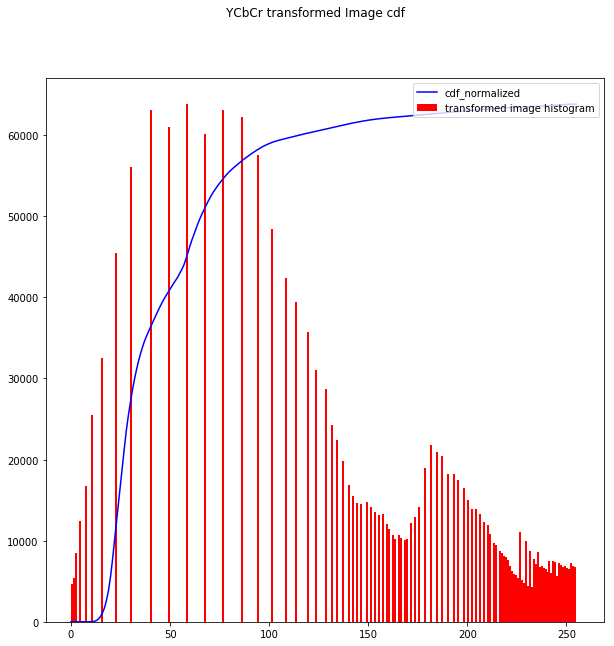

In [11]:
#as we can see this is also not well distributed, so we will apply tansformation on this channel 'Y'

cdf_m_Y = np.ma.masked_equal(cdf_Y,0)
cdf_m_Y = ((cdf_m_Y - cdf_m_Y.min())*255)/(cdf_m_Y.max() - cdf_m_Y.min())
cdf_scaled_Y = np.ma.filled(cdf_m_Y,0).astype('uint8')
img3 = cdf_scaled_Y[img_y]


fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("YCbCr transformed Image cdf")
ax.plot(cdf_normalized_Y,color='b')
ax.hist(img3.flatten(),256,[0,256],color='r')
ax.legend(['cdf_normalized','transformed image histogram'],loc='upper right')
plt.savefig('images/output_histogram_Y.png')
plt.show()


In [12]:
#merging back to original!
ycbcr_to_float.setflags(write = 1)

ycbcr_transformed = ycbcr_to_float
ycbcr_transformed[:,:,0] = img3 


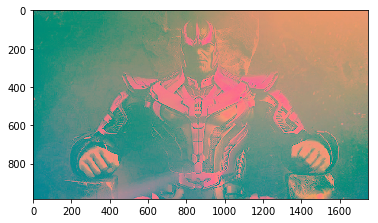

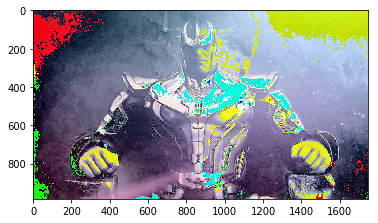

In [13]:
#transformed image in 'YCbCr' format

plt.imshow(ycbcr_transformed[:,:,:].astype('uint8'),cmap='gray')
plt.savefig("images/RGB-YCbCr-transformed.png")
plt.show()


RGB_transformed = ycbcr2rgb(ycbcr_transformed)
plt.imshow(RGB_transformed.astype('uint8'),cmap='gray')
plt.savefig('images/RGB-YCbCr-RGB_transfomed.png')
plt.show()


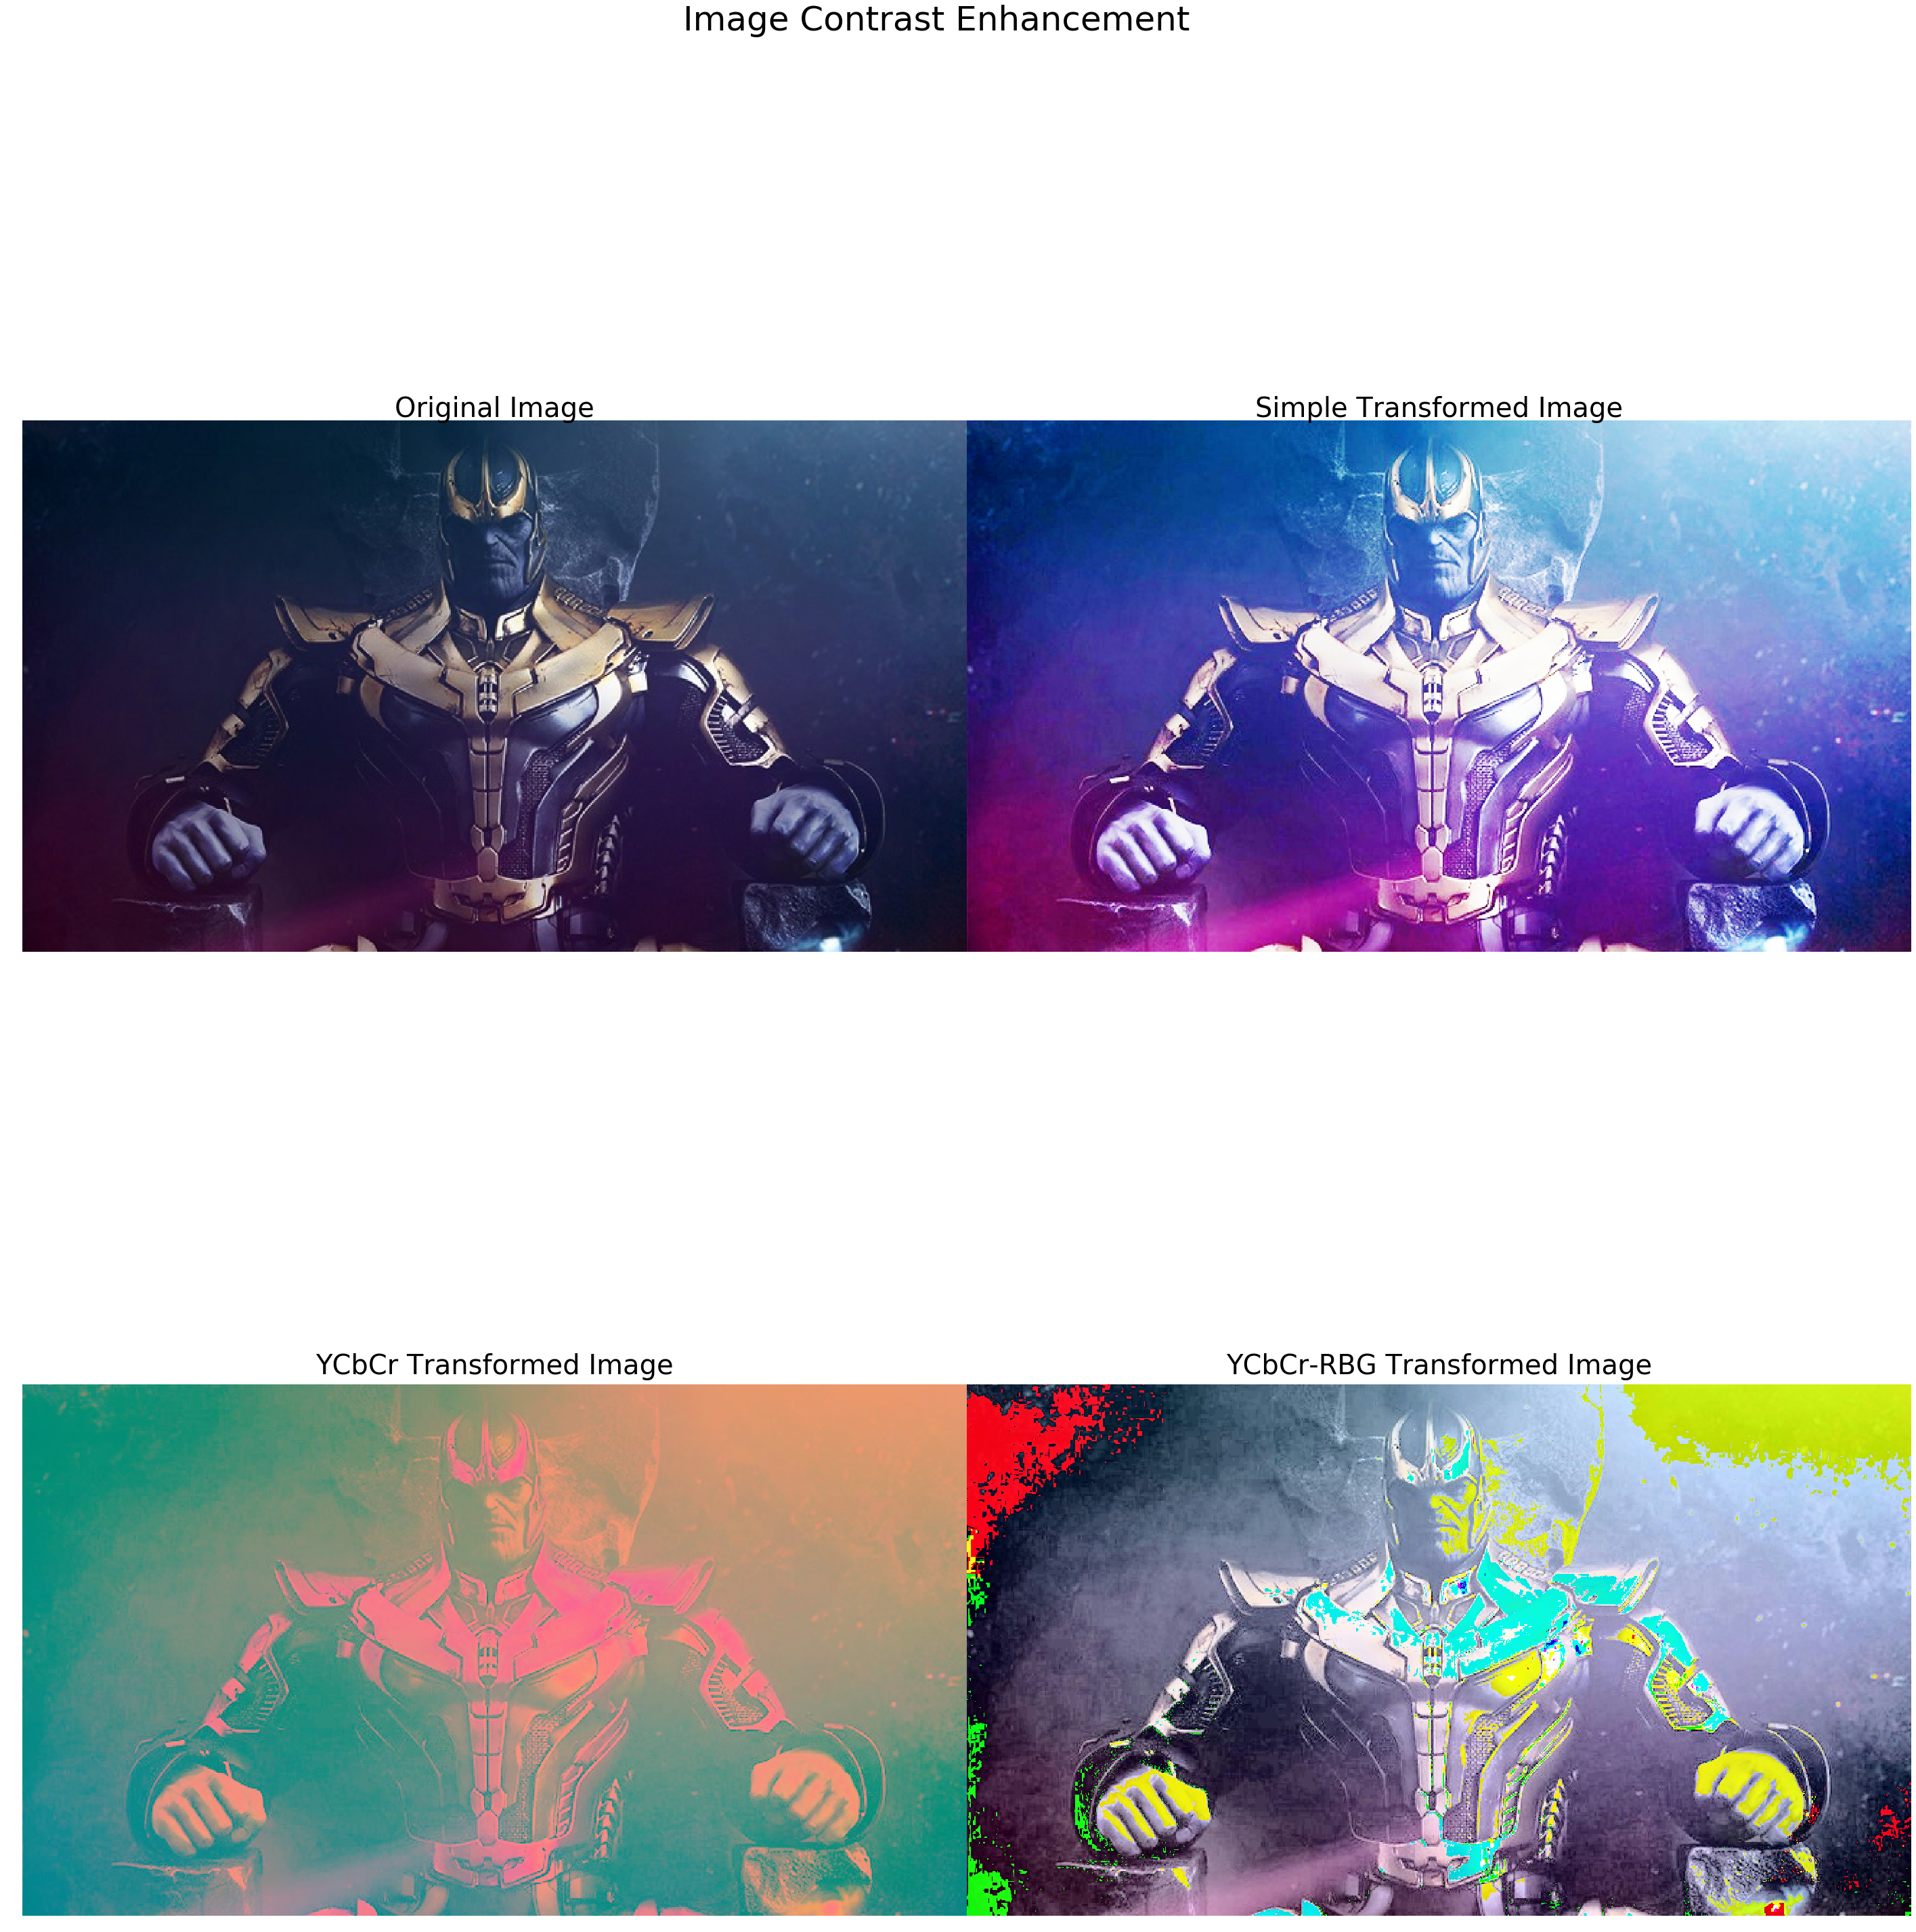

In [14]:
#plotting all 4 together!

font_dict = {'fontsize': 40,
             'fontweight' : 40,
             'verticalalignment':'baseline',
             }


font_dict2 = {'fontsize': 40,
             'fontweight' : 40,
             'verticalalignment':'bottom',
             }

fig,axes = plt.subplots(2,2,figsize=(50,50),sharey = True,)
fig.suptitle('Image Contrast Enhancement', fontsize=50,fontweight = 50)

axes[0,0].imshow(img.astype('uint8'),cmap = 'gray')
axes[0,0].set_axis_off()
axes[0,0].set_title("Original Image",fontdict = font_dict)

axes[0,1].imshow(img2.astype('uint8'),cmap = 'gray')
axes[0,1].set_axis_off()
axes[0,1].set_title("Simple Transformed Image",fontdict = font_dict)

axes[1,0].imshow(ycbcr_transformed[:,:,:].astype('uint8'),cmap = 'gray')
axes[1,0].set_axis_off()
axes[1,0].set_title("YCbCr Transformed Image",fontdict = font_dict2)

axes[1,1].imshow(RGB_transformed.astype('uint8'),cmap = 'gray')
axes[1,1].set_axis_off()
axes[1,1].set_title("YCbCr-RBG Transformed Image",fontdict = font_dict2)

plt.subplots_adjust(wspace=0)
plt.subplots_adjust(hspace = 0.1)
plt.savefig('images/Final Analysis.png')
